In [48]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading CSV File

In [29]:
finance = pd.read_csv("complaints.csv")

In [30]:
finance.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-08-14,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,18109,NaN,Consent not provided,Web,2024-08-14,Closed with non-monetary relief,Yes,NaN,9801027
1,2024-08-07,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,17403,NaN,NaN,Web,2024-08-07,In progress,Yes,NaN,9736958
2,2024-09-18,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,12601,NaN,NaN,Web,2024-09-18,In progress,Yes,NaN,10157378
3,2024-09-03,Debt collection,Credit card debt,Threatened to contact someone or share informa...,Contacted you after you asked them to stop,NaN,NaN,"Affirm Holdings, Inc",NC,28540,Servicemember,NaN,Web,2024-09-03,Closed with explanation,Yes,NaN,10005302
4,2024-07-21,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,NV,89103,NaN,Consent not provided,Web,2024-07-21,In progress,Yes,NaN,9574052


## Unique Values of Target Columns

In [31]:
finance.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [32]:
finance['Consumer disputed?'].value_counts()

Consumer disputed?
No     619938
Yes    148378
Name: count, dtype: int64

Consumer Dispute in Percentage:

In [33]:
finance['Consumer disputed?'].value_counts(normalize=True)*100

Consumer disputed?
No     80.687894
Yes    19.312106
Name: proportion, dtype: float64

## Info of the data 

In [34]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6197930 entries, 0 to 6197929
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 851.

there is no numerical feature as all the datatypes are object.

## Exploring the Data

#### checking the null values

In [35]:
missing = finance.isnull().sum()

In [36]:
missing

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        748588
Consumer complaint narrative    4074742
Company public response         3185323
Company                               0
State                             47790
ZIP code                          30227
Tags                            5675299
Consumer consent provided?      1153059
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              5429614
Complaint ID                          0
dtype: int64

In [37]:
missing = finance.isnull().sum().div(finance.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

In [38]:
missing

,0
Tags,91.567652
Consumer disputed?,87.603668
Consumer complaint narrative,65.743595
Company public response,51.393336
Consumer consent provided?,18.603937
Sub-issue,12.078033
Sub-product,3.796348
State,0.771064
ZIP code,0.487695
Company response to consumer,0.000323


In [39]:
drop_columns = ['Tags','Consumer complaint narrative','Company public response','Sub-issue','Sub-product']

In [40]:
finance.drop(drop_columns, axis=1, inplace=True)

In [41]:
finance

,Date received,Product,Issue,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-08-14,Credit reporting or other personal consumer re...,Incorrect information on your report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,18109,Consent not provided,Web,2024-08-14,Closed with non-monetary relief,Yes,NaN,9801027
1,2024-08-07,Credit reporting or other personal consumer re...,Incorrect information on your report,"EQUIFAX, INC.",PA,17403,NaN,Web,2024-08-07,In progress,Yes,NaN,9736958
2,2024-09-18,Debt collection,Attempts to collect debt not owed,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,12601,NaN,Web,2024-09-18,In progress,Yes,NaN,10157378
3,2024-09-03,Debt collection,Threatened to contact someone or share informa...,"Affirm Holdings, Inc",NC,28540,NaN,Web,2024-09-03,Closed with explanation,Yes,NaN,10005302
4,2024-07-21,Credit reporting or other personal consumer re...,Incorrect information on your report,Experian Information Solutions Inc.,NV,89103,Consent not provided,Web,2024-07-21,In progress,Yes,NaN,9574052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197925,2022-08-19,"Credit reporting, credit repair services, or o...",Incorrect information on your report,"EQUIFAX, INC.",CA,90630,Consent provided,Web,2022-08-19,Closed with explanation,Yes,NaN,5891592
6197926,2022-08-19,"Credit reporting, credit repair services, or o...",Incorrect information on your report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90630,Consent provided,Web,2022-08-19,Closed with non-monetary relief,Yes,NaN,5891593
6197927,2016-09-08,Credit reporting,Unable to get credit report/credit score,"EQUIFAX, INC.",FL,32853,Consent not provided,Web,2016-09-08,Closed with explanation,Yes,Yes,2102374
6197928,2022-06-06,"Credit reporting, credit repair services, or o...",Problem with a credit reporting company's inve...,"EQUIFAX, INC.",CA,93638,Consent not provided,Web,2022-06-06,Closed with explanation,Yes,NaN,5637858


#### Number of unique values in each column

In [43]:
for col in finance.columns:
    print(col, finance[col].nunique())

Date received 4677
Product 21
Issue 178
Company 7366
State 63
ZIP code 33981
Consumer consent provided? 4
Submitted via 7
Date sent to company 4626
Company response to consumer 8
Timely response? 2
Consumer disputed? 2
Complaint ID 6197930


## Visualisation

##### Target Feature

In [49]:
percentage = finance['Consumer disputed?'].value_counts(normalize=True)*100
label= ["No", "Yes"]

([<matplotlib.patches.Wedge at 0x21e03a72ac0>,
 [Text(-0.6271822945771851, -0.9036826707251263, 'No'),
  Text(0.6841987745108777, 0.9858357048503636, 'Yes')],
 [Text(-0.3420994334057373, -0.4929178203955234, '80.69%'),
  Text(0.399115951798012, 0.5750708278293787, '19.31%')])

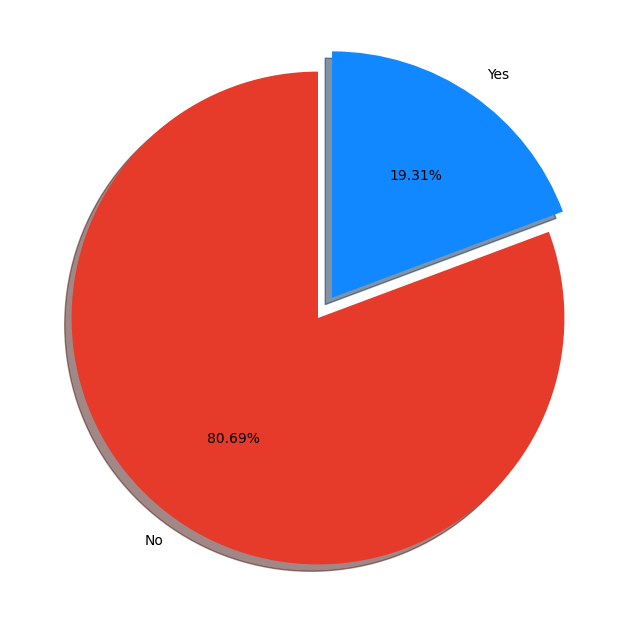

In [51]:
fig, ax = plt.subplots(figsize = (15,8))
explode = (0,0.1)
colors = ['#e63a2a', '#1188ff']
ax.pie(percentage, labels = label, startangle =90,
       autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)

It looks like an imbalanced Data.